## Machine Learning Lab Work - 2


Subject: Advanced Machine Learning |
Full Name: Ravinthiran Partheepan


Your task is to:
1. Create a Jupyter Notebook, import relevant libraries, comment on what is happening in markdown cells.
2. Load the two files into Pandas DataFrames. Make sure that the answers "None" are not interpreted as NaN by Pandas.
3. Produce a bar plot of response frequencies to the second question, for year 2023. You should get something similar to the graph in Lecture 1 Slide 25.
4. Produce a similar bar plot for a different question, but with values for all the years 2020-2023 in a single plot, as bars of different colors for the different years, next to each other.
5. Compute weighted averages for each question and year, averaging the weights of the answers instead of their string values. You should get a single number for each question and year combination. Visualise in a simple line plot how some of those values changed over the years.
6. Visualize a correlation between two selected answers (over all the years) as a 2D histogram.

### Py Packages for Pandas: Dataset Processing, Numpy: Numerical Computation, and Matplotlib: Data Viz

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Transforming the Dataset into Data Frames using Pandas

In [115]:
q_data = pd.read_csv("C:/Users/ravin/KTU/Machine Learning/Task-2/Dataset/questions.csv")
q_data.head()

,Question number,Question,Answer,Answer weight
0,1,What is your level of English?,Nesuprantu kas čia prirašyta!,0
1,1,What is your level of English?,Beginner,1
2,1,What is your level of English?,Intermediate,2
3,1,What is your level of English?,Proficient,3
4,1,What is your level of English?,Fluent,4


In [116]:
r_data = pd.read_csv("C:/Users/ravin/KTU/Machine Learning/Task-2/Dataset/responses.csv")
r_data.head()

,Year,What is your level of English?,What is your level of programming experience?,What is your level of Python programming experience?,What is your level of machine learning (/deep learning) experience?,What is your attitude towards mathematics?
0,2020,Proficient,Programming is (part of) my job,I played a little bit with it,I did some ML/DL assignments in school/university,I like it
1,2020,Proficient,Programming is (part of) my job,I played a little bit with it,I have some theoretical knowledge,Neutral
2,2020,Fluent,Programming is (part of) my job,I played a little bit with it,I have some theoretical knowledge,I like it
3,2020,Fluent,Programming is (part of) my job,I did Python programming assignments in school...,I have some theoretical knowledge,Neutral
4,2020,Proficient,I did programming assignments in school/univer...,None,I have some theoretical knowledge,I love it!


In [117]:
english_col = r_data["What is your level of English?"]
english_col.head()

0    Proficient
1    Proficient
2        Fluent
3        Fluent
4    Proficient
Name: What is your level of English?, dtype: object

In [118]:
year_col = r_data[(r_data["Year"] == 2023)]
year_col.head()

,Year,What is your level of English?,What is your level of programming experience?,What is your level of Python programming experience?,What is your level of machine learning (/deep learning) experience?,What is your attitude towards mathematics?
175,2023,Fluent,Programming is (part of) my job,I did/do small Python programming projects on ...,I did some ML/DL assignments in school/university,I love it!
176,2023,Native,Programming is (part of) my job,I did Python programming assignments in school...,I did some ML/DL assignments in school/university,I love it!
177,2023,Fluent,Programming is (part of) my job,I use Python in my job,I did/do ML/DL projects on my own,I love it!
178,2023,Fluent,Programming is (part of) my job,I did/do small Python programming projects on ...,I did/do ML/DL projects on my own,I love it!
179,2023,Fluent,Programming is (part of) my job,I did Python programming assignments in school...,I did some ML/DL assignments in school/university,I like it


In [119]:
# Filter data for the year 2023
r_data_2023 = r_data[r_data['Year'] == 2023]

### Second Question Response Frequency Visualization

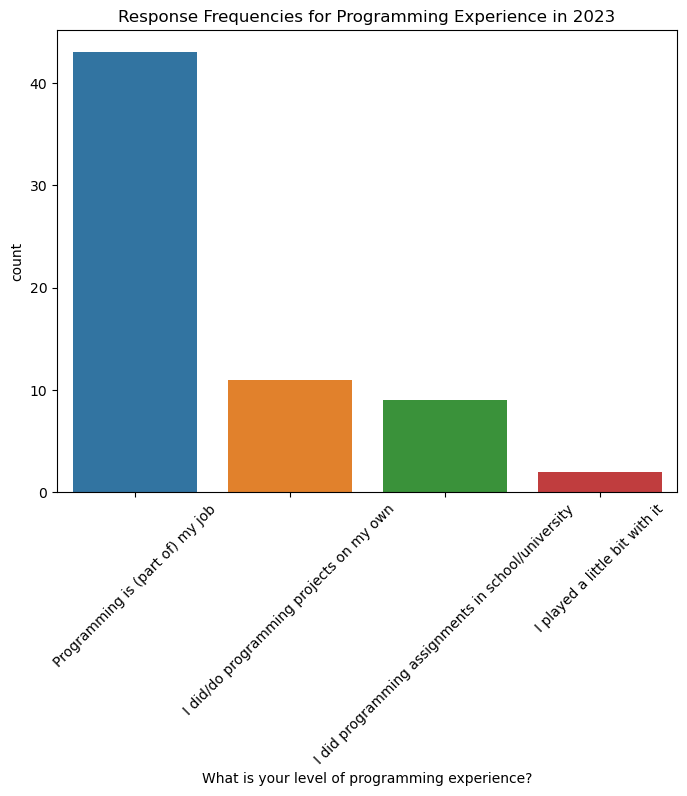

In [120]:
plt.figure(figsize=(8, 6))
sns.countplot(data=r_data_2023, x='What is your level of programming experience?')
plt.title('Response Frequencies for Programming Experience in 2023')
plt.xticks(rotation=45)
plt.show()

### Filtering Data between the years 2020-2023

In [121]:
r_data_2020_2023 = r_data[r_data['Year'].between(2020, 2023)]

### Other Question Response Frequency Visualization

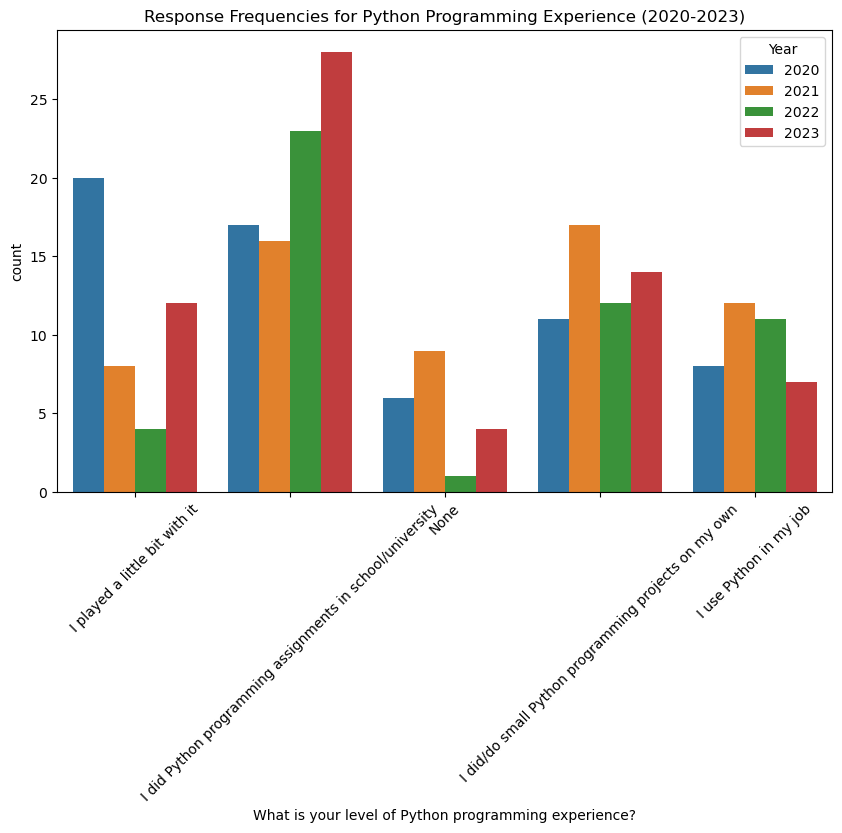

In [122]:
plt.figure(figsize=(10, 6))
sns.countplot(data=r_data_2020_2023, x='What is your level of Python programming experience?', hue='Year')
plt.title('Response Frequencies for Python Programming Experience (2020-2023)')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.show()

## Compute the weighted mean for each question along with year

### Assigning weights to labels using dictionary where keys = {None, ..., Fluent} and Values = {0,...,6}

In [123]:
weights = {
    "None": 0,
    "I played a little bit with it": 1,
    "I did some assignments in school/university": 2,
    "I have some theoretical knowledge": 3,
    "Programming is part of my job": 4,
    "Proficient": 5,
    "Fluent": 6
}

### Mapping the above weights to the respective labels

In [124]:
assign_weight = [
    "What is your level of programming experience?",
    "What is your level of Python programming experience?",
]

for questions in assign_weight:
    r_data_2020_2023[questions] = r_data_2020_2023[questions].map(weights)

### Calculating Mean

In [125]:
mean_data = r_data_2020_2023.groupby(['Year']).mean()

C:\Users\ravin\AppData\Local\Temp\ipykernel_7484\3925682347.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_data = r_data_2020_2023.groupby(['Year']).mean()


### Visualize the weighted mean of each question along with year

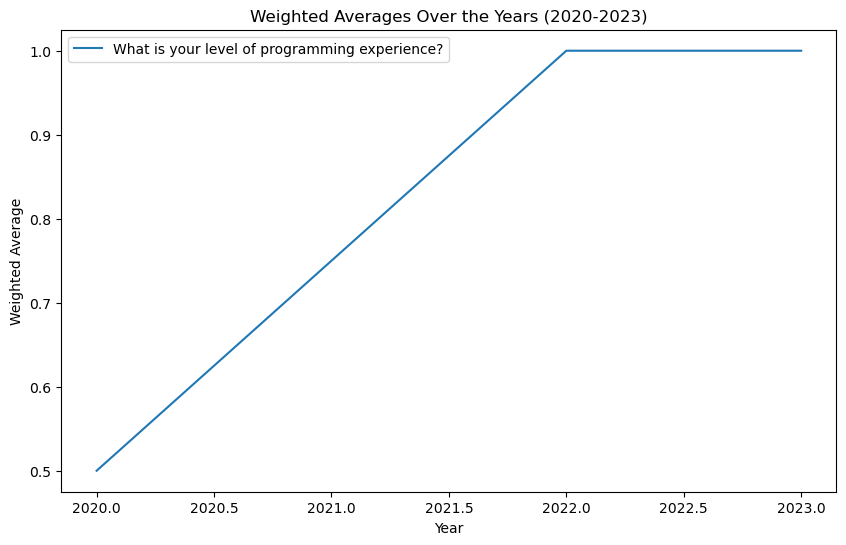

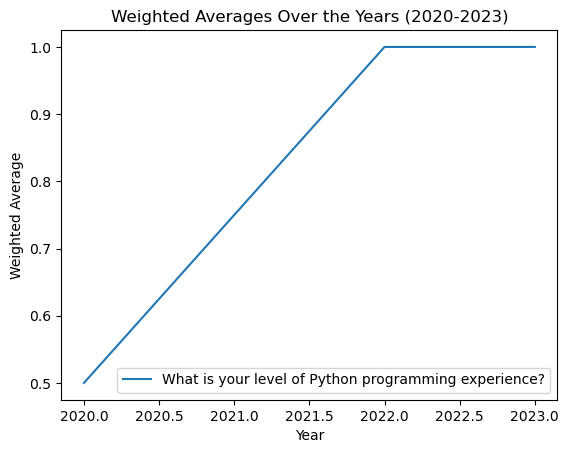

In [126]:
plt.figure(figsize=(10, 6))
for questions in assign_weight:
    plt.plot(mean_data.index, mean_data[col], label=questions)
    plt.title('Weighted Averages Over the Years (2020-2023)')
    plt.xlabel('Year')
    plt.ylabel('Weighted Average')
    plt.legend()
    plt.show()

### Visualize the correlation between two selected questions

### Taking covariance between two selected questions

In [127]:
covariance_matrix = np.cov(mean_data.T)

### Visualizing correlation between two questions using heatmap

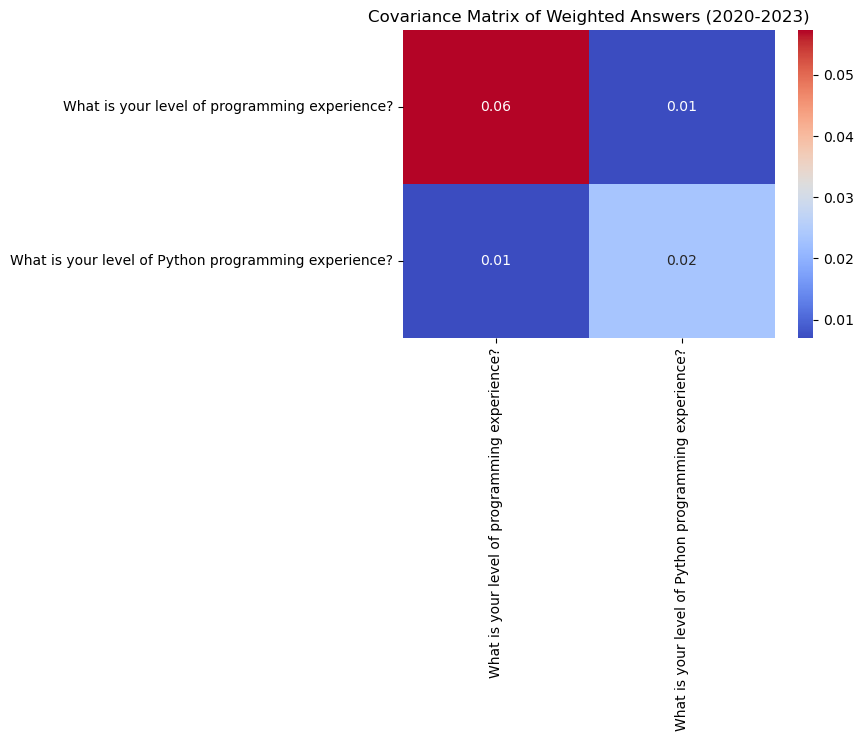

In [128]:
plt.figure(figsize=(6, 4))
sns.heatmap(data=covariance_matrix, annot=True, cmap='coolwarm', fmt='.2f', xticklabels=assign_weight, yticklabels=assign_weight)
plt.title('Covariance Matrix of Weighted Answers (2020-2023)')
plt.show()

### Will update the same for two selected answers